<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
#код в ссылке https://gist.github.com/fuwiak/9c695b51c33b2e052c5a721383705a9c
#код с ссылки запускаем так(BASH) python3 hh_parser.py
import requests
import pandas as pd

number_of_pages = 100
#number_of_ads = number_of_pages * per_page

job_title = ["'Analyst' and 'Аналитик'"]

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    
#     csv_name = job+".csv"
    csv_name = 'Analyst.csv'
    
    df.to_csv(csv_name)

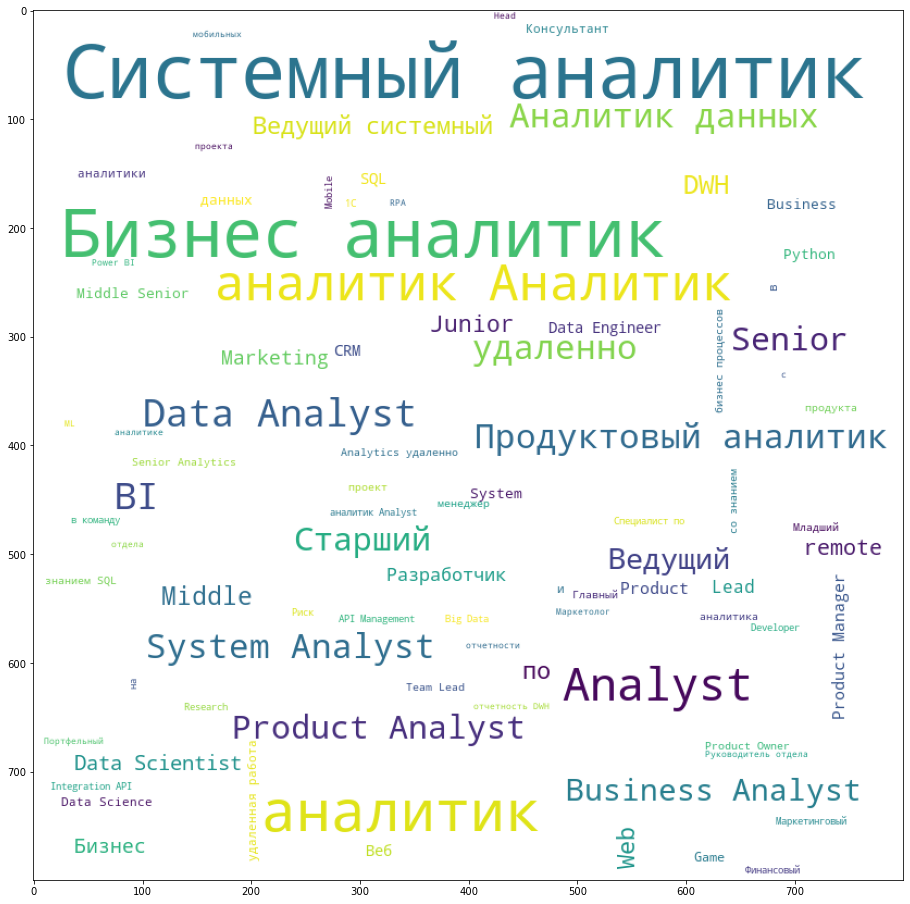

In [3]:
# графика

from collections import Counter

vacancy_names = df['name'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += x + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('Analyst.png')

In [4]:
def json_from(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['from']

def json_to(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['to']

def df_type(x):
    return type(x)

def json_currency(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['currency']

def requirement(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['requirement']

def responsibility(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['responsibility']

def name(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 'analyst'
    elif 'engineer' in x:
        return 'engineer'
    elif 'scientist' in x:
        return 'scientist'
    elif 'developer' in x:
        return 'developer'
    return None

In [5]:
# df_new.drop(df_new.index, inplace=True)
df_new = pd.DataFrame() 
df_new['name'] = df['name']
df_new['name_short'] = df['name'].apply(name)
df_new['alternate_url'] = df['alternate_url']
df_new['from'] = df['salary'].apply(json_from)
df_new['to'] = df['salary'].apply(json_to)
df_new['currency'] = df['salary'].apply(json_currency)
df_new['requirement'] = df['snippet'].apply(requirement)
df_new['responsibility'] = df['snippet'].apply(responsibility)
# df_new['Analyst'] = df['name'].apply(name_Analyst)
# df_new['Engineer'] = df['name'].apply(name_Engineer)
# df_new['Scientist'] = df['name'].apply(name_Scientist)
# df_new['Developer'] = df['name'].apply(name_Developer)

In [6]:
pd.pivot_table(df_new,
               index = ['name_short', 'currency'], 
               values = ['from', 'to'],
               aggfunc = ['max', 'min', 'mean', 'count'])

max                 min                     mean  \
                         from        to      from        to           from   
name_short currency                                                          
analyst    EUR         3500.0    3500.0    1500.0    3000.0    2500.000000   
           RUR       310000.0  525000.0   25000.0   40000.0  127863.187135   
           USD         4000.0    7000.0    1000.0    1000.0    2350.000000   
developer  RUR       100000.0  166000.0   88000.0  150000.0   94000.000000   
engineer   EUR            NaN    4000.0       NaN    4000.0            NaN   
           RUR       200000.0  370000.0  200000.0  370000.0  200000.000000   
           USD         8000.0       NaN    8000.0       NaN    8000.000000   
scientist  RUR       250000.0  350000.0  250000.0  350000.0  250000.000000   
           USD         1500.0    3000.0    1500.0    3000.0    1500.000000   

                                   count       
                                to  from   to  
name_short currency                            
analyst    EUR         3333.333333     4    3  
           RUR       185182.514124   171  177  
           USD         2866.666667     8   12  
developer  RUR       158000.000000     2    2  
engineer   EUR         4000.000000     0    1  
           RUR       370000.000000     1    1  
           USD                 NaN     1    0  
scientist  RUR       350000.000000     1    2  
           USD         3000.000000     1    1

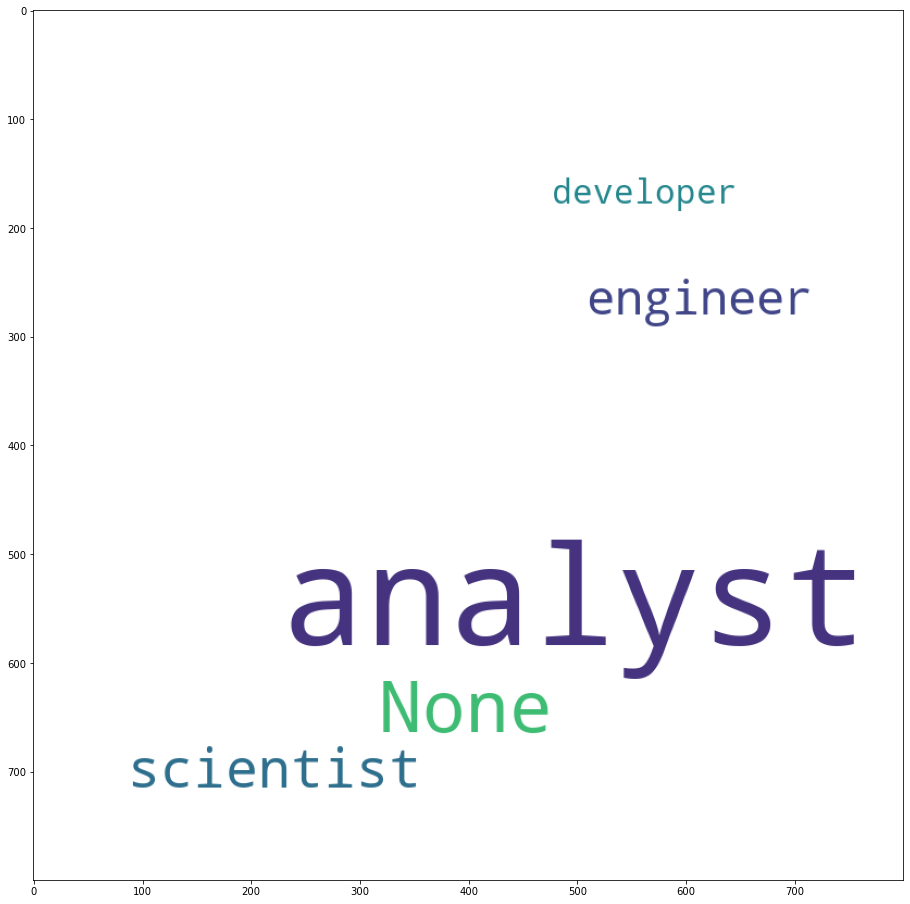

In [7]:
vacancy_names = df_new['name_short'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DS_short.png')

In [8]:
analitic = list(df_new.groupby(['name']).count().sort_values('name_short', ascending=False).head().index)
df_new.groupby(['name']).count().sort_values('name_short', ascending=False).head()
analitic

['Системный аналитик',
 'Бизнес-аналитик',
 'Аналитик',
 'Ведущий системный аналитик',
 'Продуктовый аналитик']

In [9]:
df_analyst5 = df_new[df_new['name'].isin(analitic)]
df_analyst5 = df_analyst5[['name', 'from', 'to', 'currency']]
df_analyst5['mean'] = df_analyst5['to'] - df_analyst5['from']
pd.pivot_table(df_analyst5,
               index = ['name', 'currency'], 
               #values = ['from', 'to'],
               aggfunc = {#'from': [max, min, np.mean, len], 
                          #'to': [max, min, np.mean, len],
                          'mean': [max, min, np.mean],
#                           'name': ['count']
                          }
              )

mean                    
                                          max      mean       min
name                       currency                              
Аналитик                   RUR        60000.0   40000.0       0.0
Бизнес-аналитик            RUR       180000.0   60500.0       0.0
Ведущий системный аналитик RUR       100000.0  100000.0  100000.0
Системный аналитик         RUR       150000.0   72500.0   20000.0